In [1]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Use this for larger plots:
#matplotlib.rc('figure', figsize=(15, 10))
matplotlib.rc('figure', figsize=(10, 8))

<div style="text-align:center">
<h1>Numpy and the Python Scientific Ecosystem</h1>

<br><br>
<img src="numpy-logo.png" style="width: 50%; margin: auto;">
</div>

# Example from last lecture

In [3]:
l = [1, 10, 100]

# Take log10 of all list elements:
[math.log(i, 10) for i in l]

[0.0, 1.0, 2.0]

In [4]:
l = [1, 10, 100]

# take log10 of all list elements:
np.log10(l)

array([0., 1., 2.])

# Another example from last lecture

In [5]:
import csv
from pathlib import Path

def read_infected_cases():
    """Read number of infected cases from CSV file and return as list of int."""
    
    fname = Path('..') / 'lecture03-python-introduction' / 'austria_covid_19_data.csv'
    with open(fname, 'r') as read_obj:
        # pass the file object to reader() to get the reader object
        csv_reader = csv.reader(read_obj)
        # Pass reader object to list() to get a list of lists
        list_of_rows = list(csv_reader)

    # get second column
    infected_cases = [i[1] for i in list_of_rows]

    # remove first line, as it contains header
    infected_cases = infected_cases[1:]

    # convert to integer, as it is string
    infected_cases = [int(i) for i in infected_cases]

    return infected_cases

In [6]:
infected_cases = read_infected_cases()

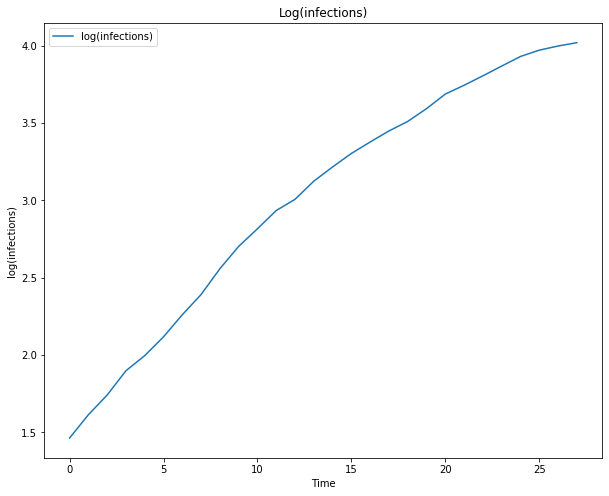

In [7]:
import matplotlib.pyplot as plt
import math

plt.plot([math.log(i, 10) for i in infected_cases], label = 'log(infections)')

plt.xlabel('Time')
plt.ylabel('log(infections)')

plt.title('Log(infections)')

plt.legend()
plt.show()

The same thing with numpy a bit shorter:

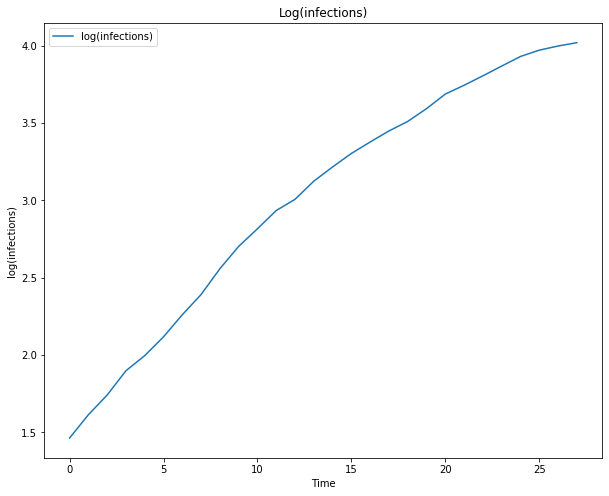

In [8]:
import matplotlib.pyplot as plt
import math

plt.plot(np.log10(infected_cases), label = 'log(infections)')

plt.xlabel('Time')
plt.ylabel('log(infections)')

plt.title('Log(infections)')

plt.legend()
plt.show()

# The Python Scientific Ecosystem

<br>
<div style="text-align:center">
<img alt="Python scientific ecosystem" src="python-scientific-ecosystem.png" style="height:650px;">
</div>

<small>Source: https://speakerdeck.com/jakevdp/the-state-of-the-stack-scipy-2015-keynote?slide=8</small>

# Numpy: the ndarray data type

In [9]:
import numpy as np

In [10]:
np.array([1., 2., 5.])

array([1., 2., 5.])

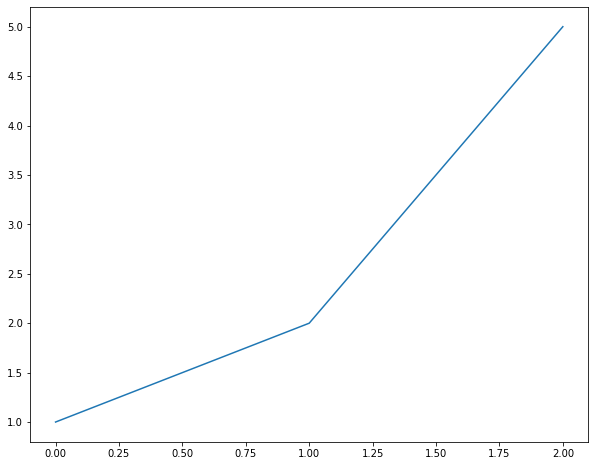

In [11]:
arbitrary_values = np.array([1., 2., 5.])

plt.plot(arbitrary_values)

# Accessing elements in Numpy arrays

In [12]:
arbitrary_values

array([1., 2., 5.])

In [13]:
arbitrary_values[2]

5.0

In [14]:
arbitrary_values[2:]

array([5.])

In [15]:
arbitrary_values[0:2]

array([1., 2.])

In [16]:
arbitrary_values[:]

array([1., 2., 5.])

In [17]:
type(arbitrary_values)

numpy.ndarray

**Note:** do not use `np.ndarray()` to create a new `ndarray` object, use `np.array()`!

# Dimensions and shape

In [18]:
unity_matrix = np.array([[1., 0., 0.],
                         [0., 1., 0.],
                         [0., 0., 1.]])

In [19]:
unity_matrix.shape

(3, 3)

In [20]:
unity_matrix[2, 2]

1.0

In [21]:
unity_matrix[2, :]

array([0., 0., 1.])

In [22]:
len(unity_matrix)

3

In [23]:
arbitrary_values.shape

(3,)

# Elementwise operations and broadcasting

Remember, with Python list you cannot combine numbers and lists arithmetically:

In [24]:
#[1, 2, 3] + 10

In [25]:
np.array([1, 2, 3]) + 10

array([11, 12, 13])

In [26]:
np.array([1, 2, 3]) * 10

array([10, 20, 30])

In [27]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [28]:
np.arange(5)**2

array([ 0,  1,  4,  9, 16])

In [29]:
np.cos(np.arange(5) * 2 * np.pi)

array([1., 1., 1., 1., 1.])

# Let's do exercise 1!

Solve exercise 1 in `lecture04-python-scientific-ecosystem/exercises04.ipynb`

# Let's do something with real data

Public toilets in Vienna:
https://www.data.gv.at/katalog/dataset/d9f5e582-3773-4f0b-8403-5d34718f6cf7

Note: we use the order (longitude, latitude) here. This is the order used in shape files and necessary for plotting too.

In [30]:
import urllib
import os.path
from pathlib import Path
import pandas as pd

def read_public_toilets():
    """Download CSV with geocordinates of public toilets in Vienna, parse it and return a numpy
    array of shape (N,2), where each point is (longitude_x, latitude_y)."""
    fname = Path('..') / 'data' / 'public-toilets.csv'
    if not os.path.exists(fname):
        URI = ('https://data.wien.gv.at/daten/geo?'
               'service=WFS&request=GetFeature&version=1.1.0&'
               'typeName=ogdwien:WCANLAGEOGD&srsName=EPSG:4326&outputFormat=csv')
        urllib.request.urlretrieve(URI, filename=fname)
        
    d = pd.read_csv(fname)
    return d.SHAPE.str.extract(r'POINT \((\d+\.\d+) (\d+\.\d+)\)').astype(float).values

In [31]:
public_toilets = read_public_toilets()

In [32]:
public_toilets.shape

(180, 2)

In [33]:
public_toilets[:5]

array([[16.35523933, 48.18788499],
       [16.25589972, 48.20254204],
       [16.35651454, 48.19659866],
       [16.47962036, 48.24201014],
       [16.33946612, 48.18167876]])

In [34]:
stephansplatz = np.array([16.372223, 48.208432])

In [35]:
# Length of one degree longitude/latitude on stephansplatz:
LON_TO_KM = 74.1
LAT_TO_KM = 111.19

Doing calculations with longitude/latitude is difficult. Let's project the points to cartesian coordinates in kilometers with origin at the Stephansplatz. Of course this it's not very accurate to project longitude/latitude that way, but for a small area like Vienna it should be good enough:

In [36]:
def to_km(locations):
    return (locations - stephansplatz) * [LON_TO_KM, LAT_TO_KM]

In [37]:
public_toilets_km = to_km(public_toilets)

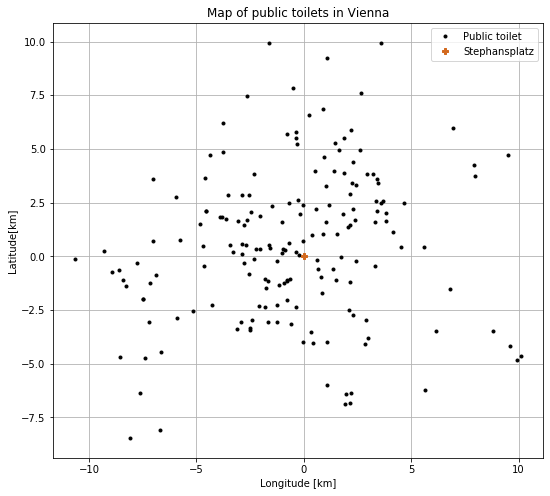

In [38]:
plt.plot(public_toilets_km.T[0], public_toilets_km.T[1], 'ko', markersize=3, label='Public toilet');
plt.plot([0], [0], 'P', label='Stephansplatz', color='chocolate')
plt.gca().set_aspect('equal')
plt.legend();
plt.title('Map of public toilets in Vienna')
plt.xlabel('Longitude [km]')
plt.ylabel('Latitude[km]')
plt.grid();

Let's add a simple (inaccurate) map of Vienna (adapted version from [this one](https://commons.wikimedia.org/wiki/Category:Maps_of_Vienna#/media/File:Gemeindebezirke_Wiens.svg), license: public domain). See also [interactive map of public toilets](https://m.wien.gv.at/stadtplan/#base=karte&zoom=12&lat=48.2023&lon=16.4142&layer=wc).

In [39]:
vienna = plt.imread(str(Path('..') / 'data' / 'vienna-map.png'))

In [40]:
vienna.shape

(695, 925, 4)

In [41]:
# distance from Stephansplatz to borders of the PNG file in km
left = -13.682179147809752
right = 16.639373238835283
bottom = -9.81358722568525
top = 12.989326274442831
extent = left, right, bottom, top

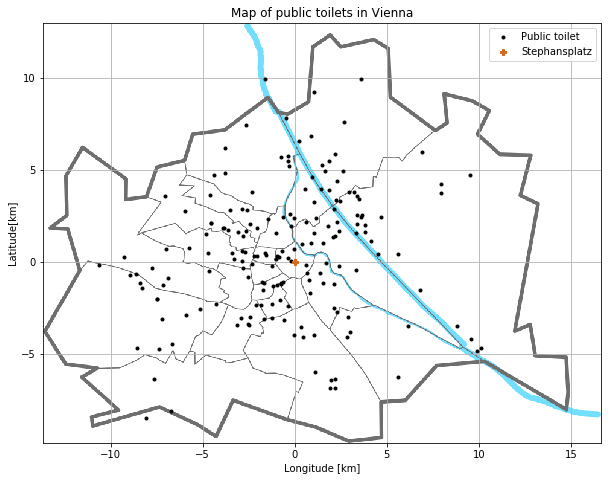

In [42]:
plt.plot(public_toilets_km.T[0], public_toilets_km.T[1], 'ko', markersize=3, label='Public toilet');
plt.plot([0], [0], 'P', label='Stephansplatz', color='chocolate')
plt.gca().set_aspect('equal')
plt.legend();
plt.title('Map of public toilets in Vienna')
plt.xlabel('Longitude [km]')
plt.ylabel('Latitude[km]')
plt.grid();

plt.imshow(vienna, extent=extent)

Hint: there are [better ways to plot geographic maps](https://matplotlib.org/basemap/users/examples.html). This is just a simple example to play with Numpy.

# Distances between locations

In [43]:
def distance(point1, point2):
    """Calculate eukledian distance between two points. Points are passed
    as lists or arrays of length 2. Numpy arrays of many dimensions are 
    supported: axis=0 must be the dimension for x/y coordinates."""
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

In [44]:
a = [1, 1]
b = [0, 0]

In [45]:
distance(a, b)

1.4142135623730951

In [46]:
you_are_here =  np.array([16.357709, 48.232303])

Unfortunately the array has the wrong shape, the first _axis_ must be the one for x/y coordinates:

In [47]:
public_toilets_km.shape

(180, 2)

Transposing the array solves this problem:

In [48]:
public_toilets_km.T.shape

(2, 180)

Why is this necessary? We can look up how `distance()` can be used by uncommenting the following lines:

In [49]:
# distance?

In [50]:
# distance??

In [51]:
public_toilets_km[:4]

array([[-1.2584903 , -2.28462192],
       [-8.61955535, -0.65490517],
       [-1.1639967 , -1.31574908],
       [ 7.95814429,  3.73355301]])

In [52]:
public_toilets_km[:4].T

array([[-1.2584903 , -8.61955535, -1.1639967 ,  7.95814429],
       [-2.28462192, -0.65490517, -1.31574908,  3.73355301]])

In [53]:
public_toilets_km[0]

array([-1.2584903 , -2.28462192])

In [54]:
public_toilets_km.T[0]

array([ -1.2584903 ,  -8.61955535,  -1.1639967 ,   7.95814429,
        -2.42728471,  -0.3504987 ,  -0.58380843,  -5.16327878,
        -8.27647527,   0.44258462,  -5.91518635,  -6.6998293 ,
         1.04777519,   1.8091567 ,   0.90201342,   2.40698792,
         2.08098926,  -8.93115738,  -6.86616349,  -8.40788027,
        -9.29394012,  -7.00598388,   3.372613  ,  -0.2665495 ,
         2.68074674,  -0.05053288,  -4.54919468,  -4.55463502,
        -3.89786561,  -2.43772988,  -0.36017306,  -0.35179768,
        -3.77166136,  -5.96509716,   3.57847811,   1.07012568,
        -0.75826205,  -0.93999559,   1.16174873,   2.11561918,
        -0.30798692,   6.15564258,  -3.29553743,  -1.56848278,
        -2.56921897,   0.5443434 ,  -3.61216863,  -2.03132104,
        -3.41949438,   0.38501993,   0.78140082,   2.27726148,
        -2.90579073,  -7.37747855,  -4.64686001,  -3.82225644,
         9.50149747,   5.58736846,  -4.82282265,  -2.20424985,
        -1.60433438,   1.53370862,   3.31194067,   6.92

In [55]:
distances_to_me = distance(public_toilets_km.T, to_km(you_are_here))

In [56]:
distances_to_me[:5]

array([4.94222773, 8.23791524, 3.97095209, 9.09788265, 5.78895338])

There is a toilet very close, less than 500m!

In [57]:
distances_to_me.min()

0.4462247392318615

Often there is another way to call Numpy functions:

In [58]:
np.min(distances_to_me)

0.4462247392318615

But where is the toilet?

In [59]:
closest_idx = distances_to_me.argmin()
closest_idx

159

In [60]:
public_toilets[closest_idx]

array([16.36326918, 48.23076184])

In [61]:
def google_maps_link(location):
    """Return link to turbine in Google maps.
    
    See documentation:
    https://developers.google.com/maps/documentation/urls/guide
    https://stackoverflow.com/questions/47038116/google-maps-url-with-pushpin-and-satellite-basemap

    """
    xlong, ylat = location
    
    # alternative API which does not allow marker
    # f"https://www.google.com/maps/@?api=1&map_action=map&center={ylat},{xlong}&basemap=satellite"
    
    # alternative API which does not allow sattelite
    # f"https://www.google.com/maps/search/?api=1&query={ylat},{xlong}"
    
    # zoom level z=xxx seems to be broken somehow (?)
    return f"http://maps.google.com/maps?q=loc:{ylat}+{xlong}&z=13"

In [62]:
print(google_maps_link(public_toilets[closest_idx]))

http://maps.google.com/maps?q=loc:48.2307618445136+16.36326918334209&z=13


In [63]:
print(google_maps_link(you_are_here))

http://maps.google.com/maps?q=loc:48.232303+16.357709&z=13


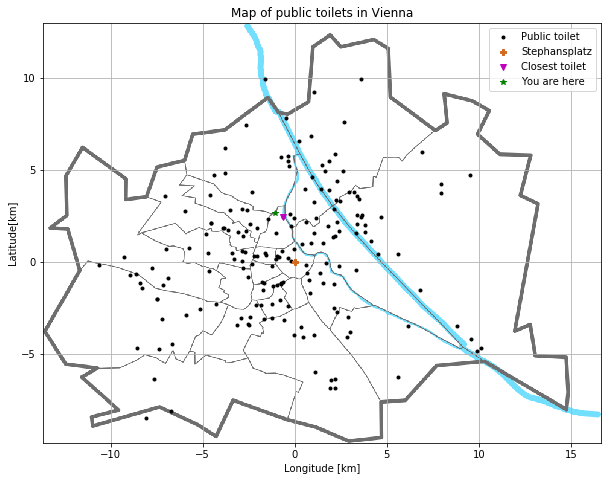

In [64]:
plt.plot(public_toilets_km.T[0], public_toilets_km.T[1], 'ko', markersize=3, label='Public toilet');
plt.plot([0], [0], 'P', label='Stephansplatz', color='chocolate')
plt.gca().set_aspect('equal')
plt.title('Map of public toilets in Vienna')
plt.xlabel('Longitude [km]')
plt.ylabel('Latitude[km]')
plt.grid();

plt.imshow(vienna, extent=extent)

plt.plot(public_toilets_km.T[0][closest_idx], public_toilets_km.T[1][closest_idx],
         'mv', label='Closest toilet');
plt.plot(*to_km(you_are_here), '*g', label='You are here');

plt.legend();

# Let's do exercise 2!

Solve exercise 2 in `lecture04-python-scientific-ecosystem/exercises04.ipynb`

# How many close toilets are there?

In [65]:
distances_to_me < 1.

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [66]:
np.sum(distances_to_me < 1.)

3

# Let's do exercise 3!

Solve exercise 3 in `lecture04-python-scientific-ecosystem/exercises04.ipynb`

# Why numpy? Performance!

One reason for using Numpy instead of pure Python is performance. 

<img src="benchmarks.svg" style="width:750px">

<small>Note that this comparison is not very fair. The Python tests are mostly done with pure Python. One can easily speed-up tests by using numpy or other libraries. Adding ``@numba.jit`` to the Fibonacci test causes a speed up of factor 50 (tested with $n=30$).</small>

<small>Source: https://julialang.org/benchmarks/</small>

Also: vector and matrix operations are way simpler to write, many numerical algorithms implemented

# How fast is Numpy in comparison to pure Python?

In [67]:
numbers = list(range(10**7))

In [68]:
%timeit sum(numbers)

94.8 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
numbers_np = np.array(numbers)

In [70]:
%timeit numbers_np.sum()

10.1 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


A factor 10 speedup comes usually for free with good simple code, but sometimes a speedup factor of 500 is also not uncommon.

# Numpy is not good at: Handling non-gridded data

Imagine somebody wants to collect the age of each person infected with Covid-19 for each day. One could use a list of lists, i.e. a Python list where each element is a list of integers:

In [71]:
infected_age_per_day = [
    [16, 41],
    [73],
    [40, 24, 83, 29],
    [],
    [64, 13],    
]

In [72]:
infected_age_per_day[2]

[40, 24, 83, 29]

The number of infected person varies, so this is not a regular array with rectangular shape.

One can convert the this lists of lists to a `numpy` array, but it is of dtype `object` and not `int`. This should be avoided!

In [73]:
np.array(infected_age_per_day)

array([list([16, 41]), list([73]), list([40, 24, 83, 29]), list([]),
       list([64, 13])], dtype=object)